In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
myfile = r'C:/Users/KASHYAP/Desktop/segmentation_data.csv'
customer = pd.read_csv(myfile,index_col = 0)

In [3]:
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
#standardization
customer.agg(['mean', 'std'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533


In [6]:
st = StandardScaler()
customer_std = pd.DataFrame(st.fit_transform(customer), columns = list(customer.columns))
customer_std.agg(['mean', 'std'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,3.554712e-15,5.950795e-16,1.180722e-16,-6.833423e-16,6.605827e-17,2.589706e-15,-4.455103e-15
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00


In [7]:
customer_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


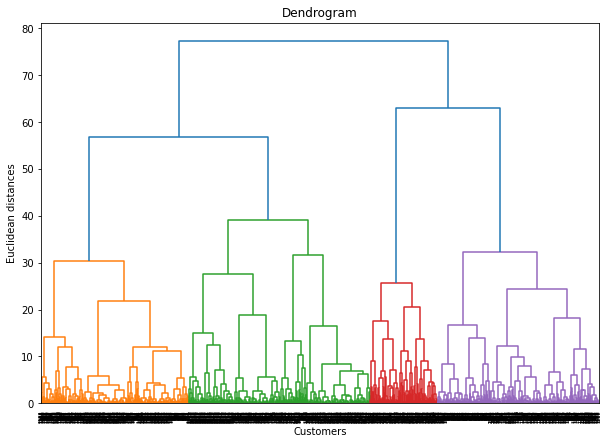

In [8]:
plt.figure(figsize = (10,7))

dendrogram = sch.dendrogram(sch.linkage(customer_std, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
#applying hierarchical clustering
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, 
                                            metric='euclidean',
                                            linkage='ward')
    cluster_labels = cluster_model.fit_predict(customer_std)
    silhouette_avg = silhouette_score(customer_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.23099458010188773
For n_clusters = 3 The average silhouette_score is: 0.24932369297836884
For n_clusters = 4 The average silhouette_score is: 0.25080894270462684
For n_clusters = 5 The average silhouette_score is: 0.261944083191251
For n_clusters = 6 The average silhouette_score is: 0.25794561218330625
For n_clusters = 7 The average silhouette_score is: 0.25485522014739065
For n_clusters = 8 The average silhouette_score is: 0.28155798833095014
For n_clusters = 9 The average silhouette_score is: 0.3016137339305145


In [ ]:
#In the above output, 5 clusters may be the appropriate number of clusters as the silhouette score is the maximum than the ones before it. 
#Otherwise there will be a lot of niche clusters if the number is greater than 5 and that defies the purpose of clustering.
#The optimal number of clusters can also be checked with a dendrogram and that turned out to be 4.
#For now, the number of clusters being considered are 4

In [10]:
hclus=AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward')

In [11]:
labels_hclus=hclus.fit_predict(customer_std)

In [12]:
labels_hclus

array([2, 3, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
customer['cluster_hclus']=labels_hclus

In [14]:
customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_hclus
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,2
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,1
100000005,0,0,53,1,149031,1,1,1


In [15]:
customer['cluster_hclus'].value_counts()

0    649
1    579
3    531
2    241
Name: cluster_hclus, dtype: int64

In [16]:
customer.groupby(['cluster_hclus']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_hclus,,,,,,,
0,0.640986,0.445300,34.583975,0.992296,90807.328197,0.101695,0.023112
1,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
3,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691


In [ ]:
#On the basis of the above summary and after referring to the data lengend, the following characteristics can be concluded for the clusters formed:
#Cluster 0 - average cluster with the lowest average income, majorly unemployed/unskilled, residing in small cities - standard
#Cluster 1 - only single males with the second highest average income, majorly skilled employee/official, residing in mid/big cities - potential well off 
#Cluster 2 - equal number of males and females, majorly non-single, attended university, majorly skilled employee/official but also a good portion of managemet/self employed/highly qualified employees, residing almost equally in mid/big cities, has the highest average income amongst all the clusters - well off
#Cluster 3 - majorly non single females cluster with third highest average income, with high school level of education, majorly skilled employee/official, residing almost equally in small and mid sized city and some also present in big, cities - hustlers 

In [17]:
#to save the result into a csv file
customer.to_csv('h_clust.csv')